### this script contains the following:

#### 1. importing libraries and data
#### 2. data cleaning
#### 3. exploring relationships
     correlations
     scatterplots
     pair Plots
     categorical Plots

### 1. importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# seting up folder path

path = '/Users/martamajer/Desktop/Desktop - Marta’s MacBook Air - 1/10-2024 Mental Health Database/'

# importing datasets

mental_illnesses_prevalence = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '01_mental_illnesses_prevalence.csv'), index_col = False)
burden_disease_daly = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '02_burden_disease_from_each_mental_illness.csv'), index_col = False)
anxiety_disorders_treatment_gap = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '05_anxiety_disorders_treatment_gap.csv'), index_col = False)
depressive_symptoms_across_us_population = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '06_depressive_symptoms_across_us_population.csv'), index_col = False)
adult_population_covered_in_primary_data_on_the_prevalence_of_mental_illnesses = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '04_adult_population_covered_in_primary_data_on_the_prevalence_of_mental_illnesses.csv'), index_col = False)

### 2. data cleaning 

#### ➡️ uniform data types across all dataFrames

In [3]:
# Changing 'Code' to an object data type, so each dataset has the same data type structure

depressive_symptoms_across_us_population['Code'] = depressive_symptoms_across_us_population['Code'].astype('object')

In [4]:
depressive_symptoms_across_us_population.dtypes

Entity                      object
Code                        object
Year                         int64
Nearly every day           float64
More than half the days    float64
Several days               float64
Not at all                 float64
dtype: object

#### ➡️ addressing missing values

In [5]:
burden_disease_daly.isnull().sum()

Entity                                                                              0
Code                                                                              690
Year                                                                                0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders      0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia             0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder          0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders          0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders         0
dtype: int64

In [6]:
mental_illnesses_prevalence_nan = mental_illnesses_prevalence[mental_illnesses_prevalence['Code'].isnull()]
unique_entities_with_nan = mental_illnesses_prevalence_nan['Entity'].unique()
print(unique_entities_with_nan)

['Africa (IHME GBD)' 'America (IHME GBD)' 'Asia (IHME GBD)'
 'Europe (IHME GBD)' 'European Union (27)' 'High-income countries'
 'Low-income countries' 'Lower-middle-income countries'
 'Upper-middle-income countries']


#### decision: 
Every DataFrame has some missing values in the 'Code' column; therefore, I will ensure that I do not use this column to merge the datasets or for analysis. As seen above the reason is that the groupped entities do not have available Codes anyway.

#### ➡️ checking duplicate values

In [7]:
depressive_symptoms_across_us_population_dups = depressive_symptoms_across_us_population[depressive_symptoms_across_us_population.duplicated()]
depressive_symptoms_across_us_population_dups

# mental_illnesses_prevalence
# burden_disease_daly
# anxiety_disorders_treatment_gap
# depressive_symptoms_across_us_population

,Entity,Code,Year,Nearly every day,More than half the days,Several days,Not at all


#### info: 
no duplicates were found in any of the datasets

In [8]:
depressive_symptoms_across_us_population.head()

,Entity,Code,Year,Nearly every day,More than half the days,Several days,Not at all
0,Appetite change,NaN,2014,4.6,5.1,15.5,74.8
1,Average across symptoms,NaN,2014,4.4,4.3,15.0,76.3
2,Depressed mood,NaN,2014,3.6,3.9,16.8,75.7
3,Difficulty concentrating,NaN,2014,3.5,3.6,10.9,82.1
4,Loss of interest,NaN,2014,4.4,5.4,16.3,73.8


#### ➡️ checking outliers

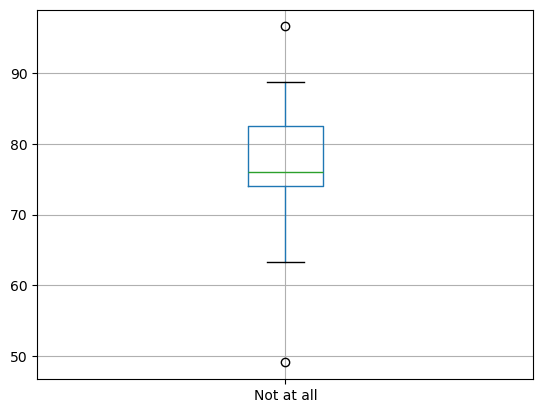

In [9]:
# checking outliers in every dataframe and column, below just examplatory df 

depressive_symptoms_across_us_population.boxplot(column=['Not at all'])
plt.show()

#### Insight:
Outliers were checked and found to be within the range of possibility. These variations could reflect differences in how countries provide treatment or the frequency of the disease's occurrence.

#### ➡️ merging two datasets on two columns [Entity (Country) and Year] and adjusting column order

In [10]:
# Merge the datasets on 'Entity' and 'Year'
mental_illness_prevalence_burden_daly = pd.merge(mental_illnesses_prevalence, burden_disease_daly, on=['Entity', 'Year', 'Code'], how='inner')

#### ➡️ mixed-type data

In [ ]:
# Function to check if a column has mixed types
def has_mixed_types(series):
    return len(series.apply(type).unique()) > 1

# Check for mixed-type columns
print("Checking for mixed-type columns:")
for col in mental_illness_prevalence_burden_daly.columns:
    if has_mixed_types(mental_illness_prevalence_burden_daly[col]):
        print(f"Column '{col}' has mixed types:")
        print(f"Dtype: {mental_illness_prevalence_burden_daly[col].dtype}")
        print(mental_illness_prevalence_burden_daly[col].apply(type).value_counts())
        print("---")

print("Done checking for mixed-type columns.")

# Display info about the DataFrame
print("\
DataFrame info:")
print(mental_illness_prevalence_burden_daly.info())

# Display the first few rows of the DataFrame
print("\
First few rows of the DataFrame:")
print(mental_illness_prevalence_burden_daly.head())

# no mixed-type data!! 

In [12]:
mental_illness_prevalence_burden_daly.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700,895.22565,138.24825,147.64412,26.471115,440.33000
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256,893.88434,137.76122,147.56696,25.548681,439.47202
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844,892.34973,137.08030,147.13086,24.637949,437.60718
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089,891.51587,136.48602,146.78812,23.863169,436.69104
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815,891.39160,136.18323,146.58481,23.189074,436.76800


#### ➡️ changing columns order

In [13]:
# Specify the desired order for columns, including Code_x and Code_y after Entity
population_columns = [
    'Entity',
    'Year',
    'Code',
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'
]

# Corresponding DALYs columns
daly_columns = [
    'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia',
    'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders',
    'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders',
    'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder',
    'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders'
]

# Combine all columns into a new order
new_column_order = population_columns + daly_columns

# Reindex the DataFrame to the new column order
mental_illness_prevalence_burden_daly = mental_illness_prevalence_burden_daly[new_column_order]

# Display the updated DataFrame
mental_illness_prevalence_burden_daly.head()

,Entity,Year,Code,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders
0,Afghanistan,1990,AFG,0.223206,4.996118,4.713314,0.703023,0.127700,138.24825,895.22565,440.33000,147.64412,26.471115
1,Afghanistan,1991,AFG,0.222454,4.989290,4.702100,0.702069,0.123256,137.76122,893.88434,439.47202,147.56696,25.548681
2,Afghanistan,1992,AFG,0.221751,4.981346,4.683743,0.700792,0.118844,137.08030,892.34973,437.60718,147.13086,24.637949
3,Afghanistan,1993,AFG,0.220987,4.976958,4.673549,0.700087,0.115089,136.48602,891.51587,436.69104,146.78812,23.863169
4,Afghanistan,1994,AFG,0.220183,4.977782,4.670810,0.699898,0.111815,136.18323,891.39160,436.76800,146.58481,23.189074


#### ➡️ changing columns names 

In [14]:
# Rename columns whose names are too long

mental_illness_prevalence_burden_daly.rename(columns = {'Entity' : 'Country(Entity)',
                     'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Rate: Schizophrenia', 
                     'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Rate: Depressive disorders',
                     'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Rate: Anxiety disorders',
                     'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Rate: Bipolar disorders',
                     'Eating disorders (share of population) - Sex: Both - Age: Age-standardized' : 'Rate: Eating disorders',
                     'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia' : 'DALYs: Schizophrenia',
                     'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders' : 'DALYs: Depressive disorders',
                     'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders' : 'DALYs: Anxiety disorders',
                     'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder' : 'DALYs: Bipolar disorder',
                     'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders' : 'DALYs: Eating disorders'},
                      inplace = True)  

In [15]:
mental_illness_prevalence_burden_daly.head()

,Country(Entity),Year,Code,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders,DALYs: Schizophrenia,DALYs: Depressive disorders,DALYs: Anxiety disorders,DALYs: Bipolar disorder,DALYs: Eating disorders
0,Afghanistan,1990,AFG,0.223206,4.996118,4.713314,0.703023,0.127700,138.24825,895.22565,440.33000,147.64412,26.471115
1,Afghanistan,1991,AFG,0.222454,4.989290,4.702100,0.702069,0.123256,137.76122,893.88434,439.47202,147.56696,25.548681
2,Afghanistan,1992,AFG,0.221751,4.981346,4.683743,0.700792,0.118844,137.08030,892.34973,437.60718,147.13086,24.637949
3,Afghanistan,1993,AFG,0.220987,4.976958,4.673549,0.700087,0.115089,136.48602,891.51587,436.69104,146.78812,23.863169
4,Afghanistan,1994,AFG,0.220183,4.977782,4.670810,0.699898,0.111815,136.18323,891.39160,436.76800,146.58481,23.189074


### 3. exploring relationships

#### ➡️ creating a correlation heatmap using matplotlib

In [17]:
correlation_matrix = mental_illness_prevalence_burden_daly.drop(columns=['Country(Entity)', 'Year', 'Code', 'DALYs: Schizophrenia', 'DALYs: Depressive disorders', 'DALYs: Anxiety disorders', 'DALYs: Bipolar disorder', 'DALYs: Eating disorders']).corr()

# Display the correlation matrix
correlation_matrix

,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders
Rate: Schizophrenia,1.000000,-0.472859,0.294208,0.117661,0.495563
Rate: Depressive disorders,-0.472859,1.000000,0.120388,0.154509,-0.046099
Rate: Anxiety disorders,0.294208,0.120388,1.000000,0.569075,0.586784
Rate: Bipolar disorders,0.117661,0.154509,0.569075,1.000000,0.674967
Rate: Eating disorders,0.495563,-0.046099,0.586784,0.674967,1.000000


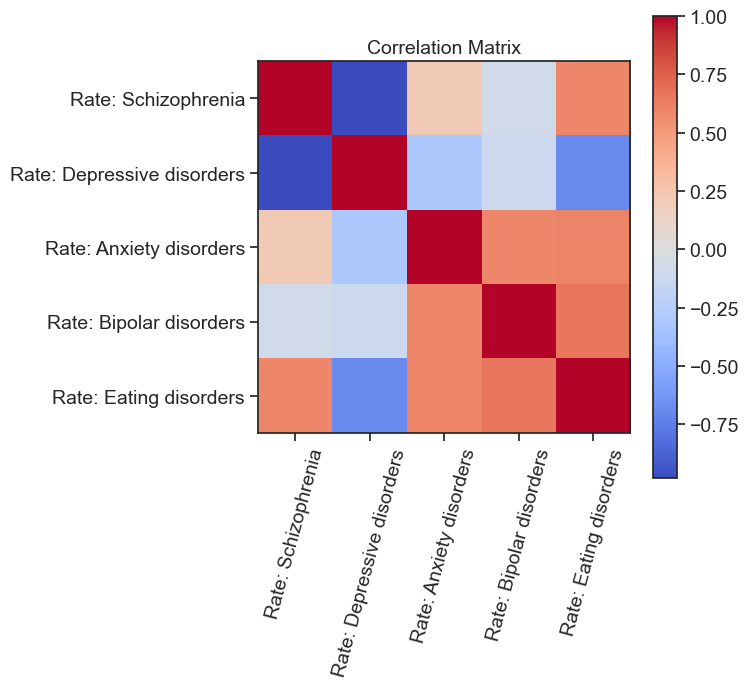

In [33]:
# Set up the figure size
f = plt.figure(figsize=(6, 6))  # Set figure size

# Use the correlation matrix directly for the plot
plt.imshow(correlation_matrix.corr(), cmap='coolwarm', interpolation='none')  # Use imshow for heatmap with a color map

# Add x and y ticks with the correct labels
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=14, rotation=75)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=14)

# Add a color bar (legend) and set its font size
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Add a title to the heatmap
plt.title('Correlation Matrix', fontsize=14)

# Show the plot
plt.show()

#### ➡️ correlation heatmap using seaborn

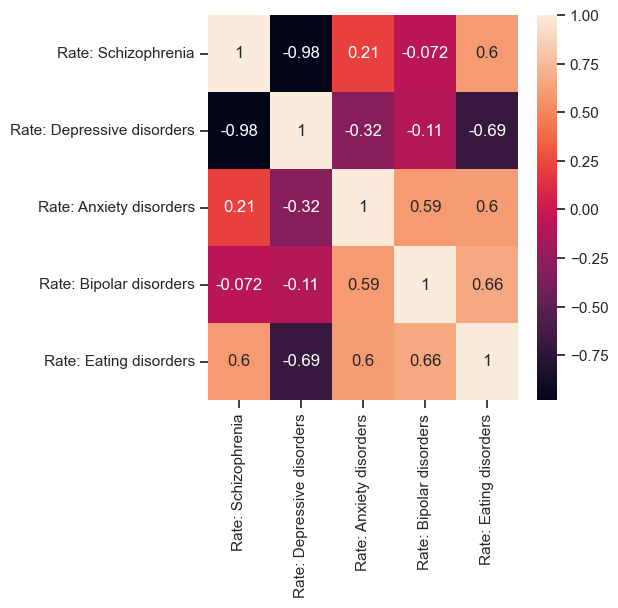

In [66]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(correlation_matrix.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.show()

### 💡 Insights:

- There is a moderate positive correlation between eating disorders and bipolar disorders. Both disorders share underlying factors such as genetics, neurochemical imbalances, and psychological issues like low self-esteem, perfectionism, or a need for control. The extreme mood swings in bipolar disorder—ranging from manic or hypomanic episodes to depressive episodes—can impact eating behaviors. During manic phases, individuals may engage in impulsive or risky behaviors, including binge eating, while during depressive phases, loss of appetite or restrictive eating is common.

- Eating disorders also show a moderate correlation with schizophrenia and anxiety disorders, suggesting overlapping factors like emotional dysregulation and stress-related behaviors. However, the negative correlation with depressive disorders is puzzling, as it contradicts the common understanding that depression significantly affects eating habits. Further investigation may be needed to clarify this relationship.

#### ➡️ scatter plots 

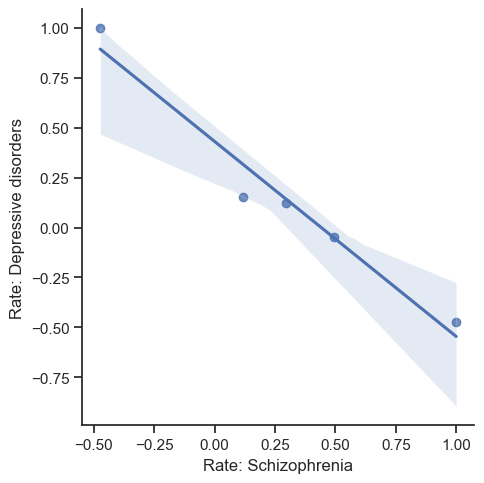

In [67]:
# Create a scatterplot for the "Depressive disorders" and "Schizophrenia" columns in seaborn - very strong negative correlation visible above 

sns.lmplot(x = 'Rate: Schizophrenia', y = 'Rate: Depressive disorders', data = correlation_matrix)
plt.show()

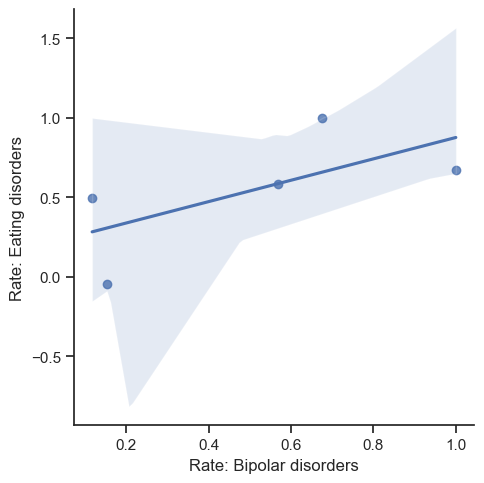

In [68]:
# Create a scatterplot for the "Eating disorders" and "Bipolar disorders" columns in seaborn - very strong negative correlation visible above 

sns.lmplot(x = 'Rate: Bipolar disorders', y = 'Rate: Eating disorders', data = correlation_matrix)
plt.show()

### 💡 Insights:

- The first scatterplot shows a strong negative correlation between schizophrenia and depressive disorders. However, people with schizophrenia often experience depressive symptoms, either as part of the disorder or due to the challenges of chronic illness. Major depressive disorder can co-occur with schizophrenia, known as schizoaffective disorder. Bipolar disorder can be misdiagnosed as major depressive disorder (MDD), especially in bipolar II, where prolonged depressive episodes resemble MDD without manic phases. This misdiagnosis could skew the interpretation of correlations between schizophrenia and depression. Bipolar disorder and schizophrenia are distinct conditions, and it's rare for individuals to have both simultaneously. While schizoaffective disorder includes symptoms of both, having both diagnoses is uncommon. If individuals misdiagnosed with depression actually have bipolar disorder, it could distort research data, falsely suggesting a correlation between schizophrenia and depression when it may not exist.

- The second scatterplot shows a moderate positive correlation between eating disorders and bipolar disorder, which I already explained in the heatmap insights.

### ➡️ pair plots 

In [40]:
# create a numerical subset 
df_pair_plots = mental_illness_prevalence_burden_daly.drop(columns=['Country(Entity)', 'Year', 'Code', 'DALYs: Schizophrenia', 'DALYs: Depressive disorders', 'DALYs: Anxiety disorders', 'DALYs: Bipolar disorder', 'DALYs: Eating disorders'])
df_pair_plots.head(5)

,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815


<Figure size 640x480 with 0 Axes>

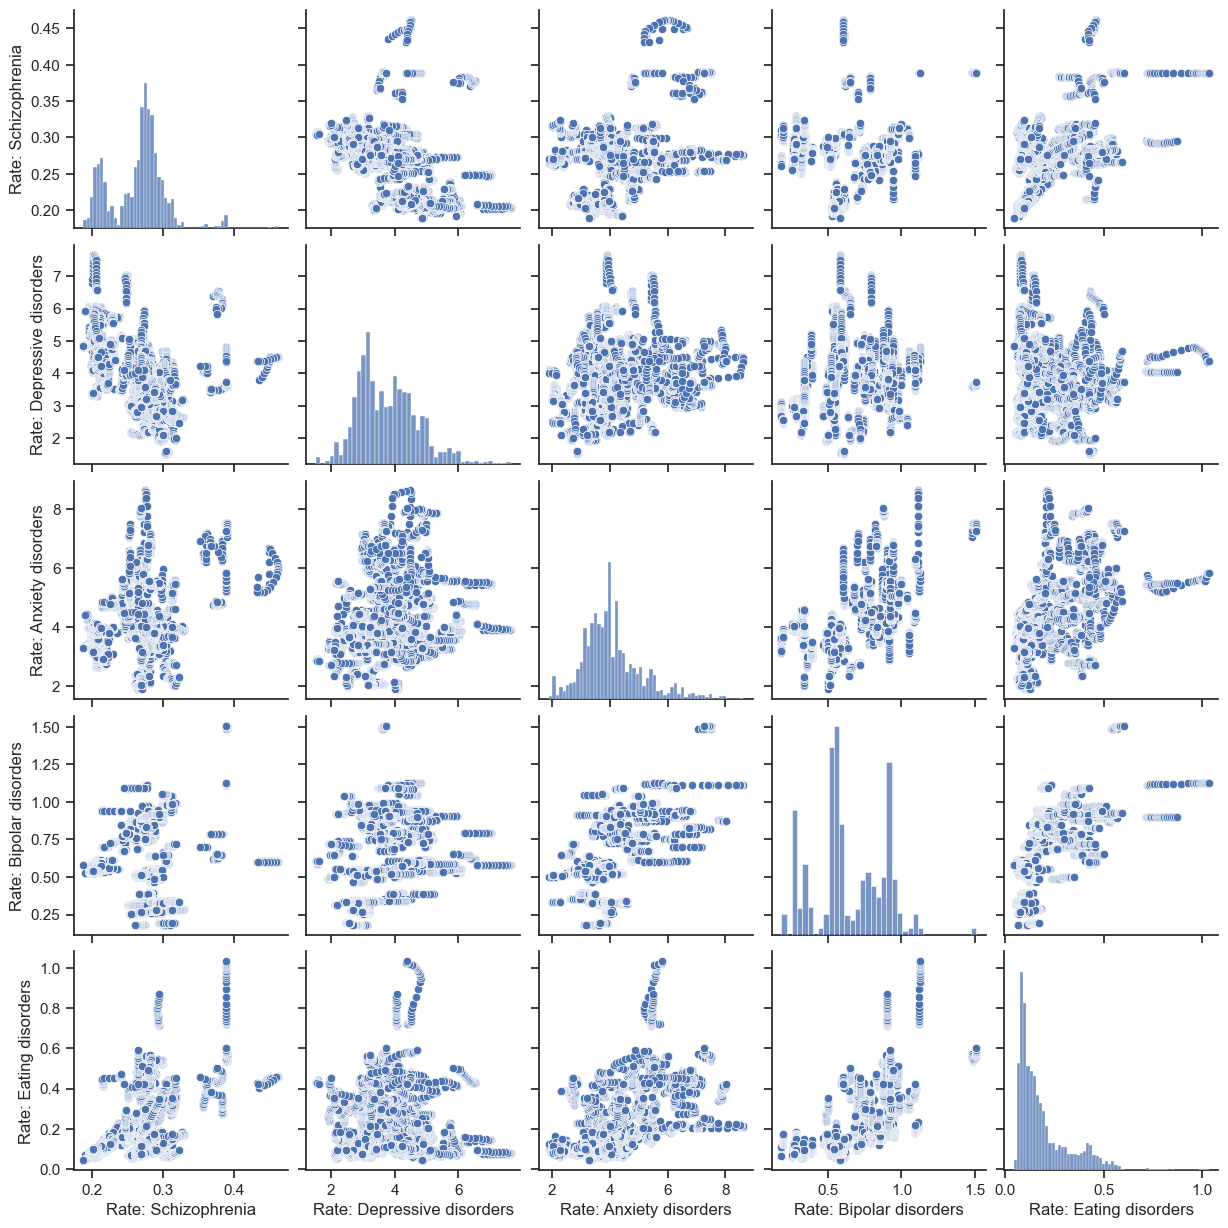

In [70]:
# create a pair plot 

g = sns.pairplot(df_pair_plots)
g.savefig('pair_plot.png', dpi=300)  # You can specify the filename and dpi for quality
plt.show()

### 💡 Insights:

- There seems to be a positive correlation between depressive disorders and anxiety disorders.
- Schizophrenia appears to have weak or no clear correlations with other disorders.
- Bipolar disorders show some positive correlation with depressive and anxiety disorders.
- Clusters: Some plots (e.g., eating disorders vs. others) show distinct clusters, suggesting potential subgroups or patterns in the data.
- Outliers: There are visible outliers in several plots, particularly for eating disorders and bipolar disorders.
- Non-linear relationships: Some relationships appear non-linear, such as between eating disorders and other variables.
- I would like to further explore the eating disorders vs. bipolar disorders. Why? The observed positive correlation between eating disorders and bipolar disorders, along with the presence of only a few outliers, suggests a potentially significant relationship that warrants further exploration. This investigation could uncover shared risk factors or mechanisms, leading to improved understanding and treatment approaches for individuals experiencing these conditions.

#### ➡️  categorical plots 

##### creating a categorical variable that splits the "Rate: Biploar disorders" column into categories

In [41]:
# create a numerical subset 
catplot_df = mental_illness_prevalence_burden_daly.drop(columns=['Country(Entity)', 'Year', 'Code', 'DALYs: Schizophrenia', 'DALYs: Depressive disorders', 'DALYs: Anxiety disorders', 'DALYs: Bipolar disorder', 'DALYs: Eating disorders'])
catplot_df.head(5)

,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815


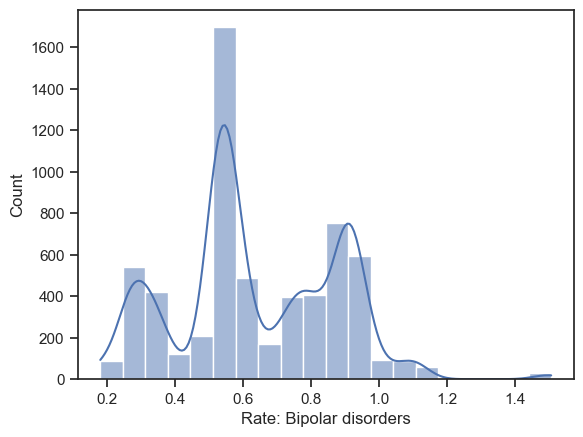

In [42]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(catplot_df['Rate: Bipolar disorders'], bins = 20, kde = True)
plt.show()

In [48]:
catplot_df.loc[catplot_df['Rate: Bipolar disorders'] < 0.5, 'Bipolar Disorder Occurrence'] = 'Low Bipolar Occurrence'

In [49]:
catplot_df.loc[(catplot_df['Rate: Bipolar disorders'] >= 0.5) & (catplot_df['Rate: Bipolar disorders'] < 0.9), 'Bipolar Disorder Occurrence'] = 'Middle Bipolar Occurrence'

In [50]:
catplot_df.loc[catplot_df['Rate: Bipolar disorders'] >= 0.9, 'Bipolar Disorder Occurrence'] = 'High Bipolar Occurrence'

In [51]:
catplot_df['Bipolar Disorder Occurrence'].value_counts(dropna = False)

Bipolar Disorder Occurrence
Middle Bipolar Occurrence    3647
Low Bipolar Occurrence       1275
High Bipolar Occurrence      1228
Name: count, dtype: int64

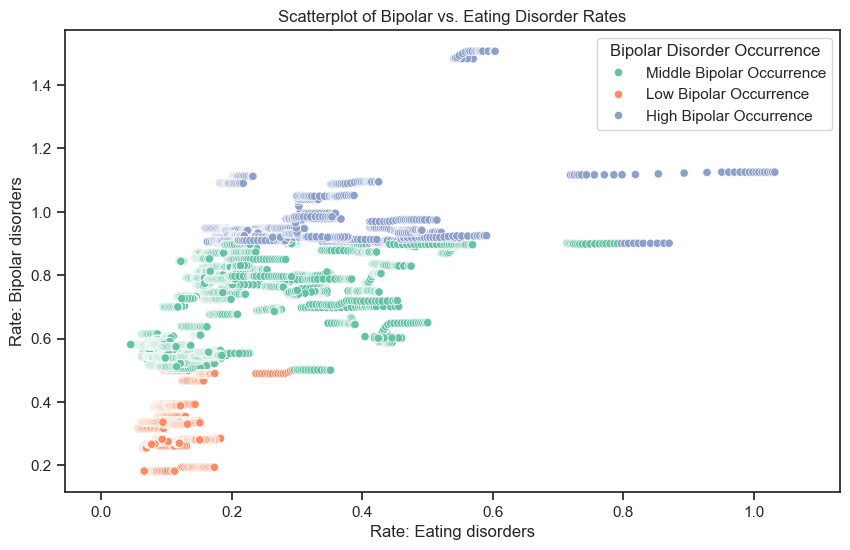

In [71]:
# Ensure "Rate: Eating disorders" is numeric
catplot_df["Rate: Eating disorders"] = pd.to_numeric(catplot_df["Rate: Eating disorders"], errors='coerce')

# Set the style for the plot
sns.set(style="ticks")

# Create a scatter plot with hue for bipolar disorder occurrence
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
g = sns.scatterplot(
    x="Rate: Eating disorders", 
    y="Rate: Bipolar disorders", 
    hue="Bipolar Disorder Occurrence", 
    data=catplot_df,
    palette="Set2"  # Optional: Choose a color palette
)

# Adjust the scale of the x-axis to better visualize the spread (optional)
plt.xlim(catplot_df["Rate: Eating disorders"].min() - 0.1, catplot_df["Rate: Eating disorders"].max() + 0.1)

# Add titles and labels
plt.title("Scatterplot of Bipolar vs. Eating Disorder Rates")
plt.xlabel("Rate: Eating disorders")
plt.ylabel("Rate: Bipolar disorders")

# Show the plot
plt.show()

### 💡 Insights:

Positive Relationship:

There appears to be a positive correlation between the rate of bipolar disorders and eating disorders up to a certain point (around 0.2-0.6 on the X-axis). As the rate of eating disorders increases, the rate of bipolar disorders also tends to increase, but there are notable clusters and plateaus after the 0.6 mark.

### exporting merged dataset 

In [72]:
# exporting csv files of the dataframe with ratios and metrics
mental_illness_prevalence_burden_daly.to_csv(os.path.join(path, '02 Data','Prepared Data', 'mental_illness_prevalence_burden_daly.csv'))

### ❓ answering previously set questions:

Many of my initial questions are tied to specific time frames or countries, so I am not yet able to provide definitive answers. However, one interesting finding has been the exploration of relationships between different disorders, such as the link between eating disorders and bipolar disorder. More broadly, it’s been insightful to observe how eating disorders often co-exist with other mental health conditions.

### 🧠 potential hypotheses: 

1. Hypothesis: Western countries, particularly in Europe and North America, show higher prevalence rates of mood disorders like depression and anxiety, while other regions may have higher rates of underreported or untreated mental illnesses.

2. Hypothesis: There is a positive correlation between mental health disorder prevalence and DALYs, with countries with high prevalence rates also experiencing higher levels of disability and years lost due to mental health conditions.

3. Hypothesis: Countries with stronger mental health interventions and healthcare systems show lower DALYs relative to their prevalence rates, as effective treatment reduces the disease burden.

4. Hypothesis: Countries with major public health initiatives focused on reducing stigma and increasing access to mental health services (e.g., Australia, Portugal, Canada, the UK) are seeing faster reductions in mental health disorder prevalence over time.